<a href="https://colab.research.google.com/github/aarifm-pfw/ML_project/blob/main/ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Standard Libraries
import os
import warnings
import math

warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.fft import fft
from scipy.signal import find_peaks

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE

import statsmodels.api as sm

!pip install tensorflow xgboost
import tensorflow as tf
from tensorflow import keras
from keras.layers import LeakyReLU

from xgboost import XGBClassifier

In [2]:
test_data = pd.read_csv('/content/exoTest.csv')
train_data = pd.read_csv('/content/exoTrain.csv')

In [3]:
#To Do: LABEL has values of 1 for no exoplanet and 2 for exoplanet. Going to change this to 0 for no exoplanet and 1 for exoplanet
categ = {2: 1,1: 0}
train_data.LABEL = [categ[item] for item in train_data.LABEL]
test_data.LABEL = [categ[item] for item in test_data.LABEL]

In [4]:
train_data.head()

LABEL   FLUX.1   FLUX.2   FLUX.3   FLUX.4   FLUX.5   FLUX.6  FLUX.7  \
0      1    93.85    83.81    20.10   -26.98   -39.56  -124.71 -135.18   
1      1   -38.88   -33.83   -58.54   -40.09   -79.31   -72.81  -86.55   
2      1   532.64   535.92   513.73   496.92   456.45   466.00  464.50   
3      1   326.52   347.39   302.35   298.13   317.74   312.70  322.33   
4      1 -1107.21 -1112.59 -1118.95 -1095.10 -1057.55 -1034.48 -998.34   

    FLUX.8  FLUX.9  ...  FLUX.3188  FLUX.3189  FLUX.3190  FLUX.3191  \
0   -96.27  -79.89  ...     -78.07    -102.15    -102.15      25.13   
1   -85.33  -83.97  ...      -3.28     -32.21     -32.21     -24.89   
2   486.39  436.56  ...     -71.69      13.31      13.31     -29.89   
3   311.31  312.42  ...       5.71      -3.73      -3.73      30.05   
4 -1022.71 -989.57  ...    -594.37    -401.66    -401.66    -357.24   

   FLUX.3192  FLUX.3193  FLUX.3194  FLUX.3195  FLUX.3196  FLUX.3197  
0      48.57      92.54      39.32      61.42       5.08     -39.54  
1      -4.86       0.76     -11.70       6.46      16.00      19.93  
2     -20.88       5.06     -11.80     -28.91     -70.02     -96.67  
3      20.03     -12.67      -8.77     -17.31     -17.35      13.98  
4    -443.76    -438.54    -399.71    -384.65    -411.79    -510.54  

[5 rows x 3198 columns]

In [5]:
train_data.isna().values.sum()

0

In [6]:
train_data.describe()

LABEL        FLUX.1        FLUX.2        FLUX.3        FLUX.4  \
count  5087.000000  5.087000e+03  5.087000e+03  5.087000e+03  5.087000e+03   
mean      0.007273  1.445054e+02  1.285778e+02  1.471348e+02  1.561512e+02   
std       0.084982  2.150669e+04  2.179717e+04  2.191309e+04  2.223366e+04   
min       0.000000 -2.278563e+05 -3.154408e+05 -2.840018e+05 -2.340069e+05   
25%       0.000000 -4.234000e+01 -3.952000e+01 -3.850500e+01 -3.505000e+01   
50%       0.000000 -7.100000e-01 -8.900000e-01 -7.400000e-01 -4.000000e-01   
75%       0.000000  4.825500e+01  4.428500e+01  4.232500e+01  3.976500e+01   
max       1.000000  1.439240e+06  1.453319e+06  1.468429e+06  1.495750e+06   

             FLUX.5        FLUX.6        FLUX.7        FLUX.8        FLUX.9  \
count  5.087000e+03  5.087000e+03  5.087000e+03  5.087000e+03  5.087000e+03   
mean   1.561477e+02  1.469646e+02  1.168380e+02  1.144983e+02  1.228639e+02   
std    2.308448e+04  2.410567e+04  2.414109e+04  2.290691e+04  2.102681e+04   
min   -4.231956e+05 -5.975521e+05 -6.724046e+05 -5.790136e+05 -3.973882e+05   
25%   -3.195500e+01 -3.338000e+01 -2.813000e+01 -2.784000e+01 -2.683500e+01   
50%   -6.100000e-01 -1.030000e+00 -8.700000e-01 -6.600000e-01 -5.600000e-01   
75%    3.975000e+01  3.514000e+01  3.406000e+01  3.170000e+01  3.045500e+01   
max    1.510937e+06  1.508152e+06  1.465743e+06  1.416827e+06  1.342888e+06   

       ...     FLUX.3188     FLUX.3189     FLUX.3190     FLUX.3191  \
count  ...  5.087000e+03  5.087000e+03  5.087000e+03  5.087000e+03   
mean   ...  3.485578e+02  4.956476e+02  6.711211e+02  7.468790e+02   
std    ...  2.864786e+04  3.551876e+04  4.349963e+04  4.981375e+04   
min    ... -3.240480e+05 -3.045540e+05 -2.933140e+05 -2.838420e+05   
25%    ... -1.760000e+01 -1.948500e+01 -1.757000e+01 -2.076000e+01   
50%    ...  2.600000e+00  2.680000e+00  3.050000e+00  3.590000e+00   
75%    ...  2.211000e+01  2.235000e+01  2.639500e+01  2.909000e+01   
max    ...  1.779338e+06  2.379227e+06  2.992070e+06  3.434973e+06   

          FLUX.3192     FLUX.3193      FLUX.3194      FLUX.3195  \
count  5.087000e+03  5.087000e+03    5087.000000    5087.000000   
mean   6.937372e+02  6.553031e+02    -494.784966    -544.594264   
std    5.087103e+04  5.339979e+04   17844.469520   17722.339334   
min   -3.288214e+05 -5.028894e+05 -775322.000000 -732006.000000   
25%   -2.226000e+01 -2.440500e+01     -26.760000     -24.065000   
50%    3.230000e+00  3.500000e+00      -0.680000       0.360000   
75%    2.780000e+01  3.085500e+01      18.175000      18.770000   
max    3.481220e+06  3.616292e+06  288607.500000  215972.000000   

           FLUX.3196      FLUX.3197  
count    5087.000000    5087.000000  
mean     -440.239100    -300.536399  
std     16273.406292   14459.795577  
min   -700992.000000 -643170.000000  
25%       -21.135000     -19.820000  
50%         0.900000       1.430000  
75%        19.465000      20.280000  
max    207590.000000  211302.000000  

[8 rows x 3198 columns]

Text(0.5, 0.98, '(0: Not Exoplanet || 1: Exoplanet)\n')

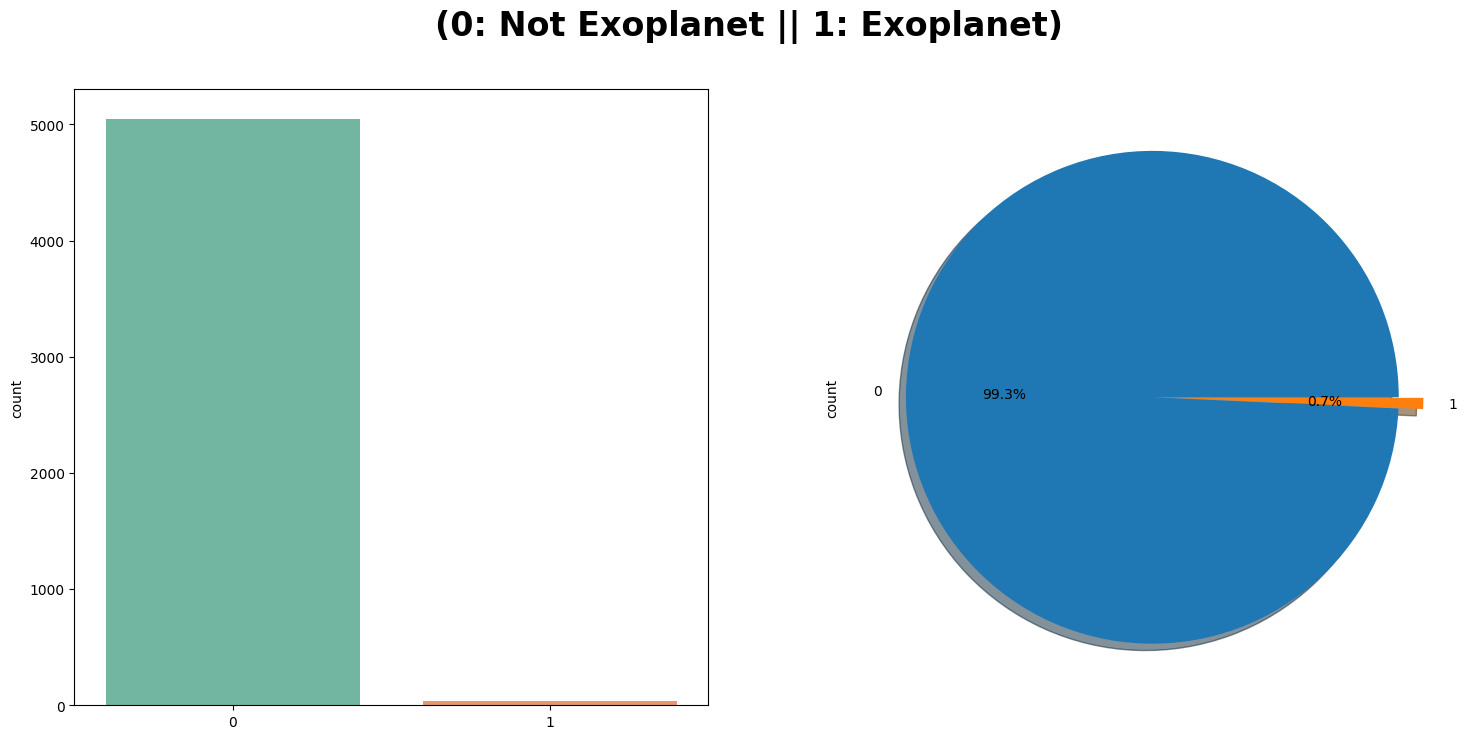

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(18,8))
sns.countplot(x = 'LABEL', data=train_data, palette = "Set2", ax = ax[0])
ax[0].set_xlabel('')
train_data['LABEL'].value_counts().plot.pie(explode = [0,0.1], autopct ='%1.1f%%',ax = ax[1], shadow = True)
fig.suptitle('(0: Not Exoplanet || 1: Exoplanet)\n', fontsize = 24, fontweight = 'bold')

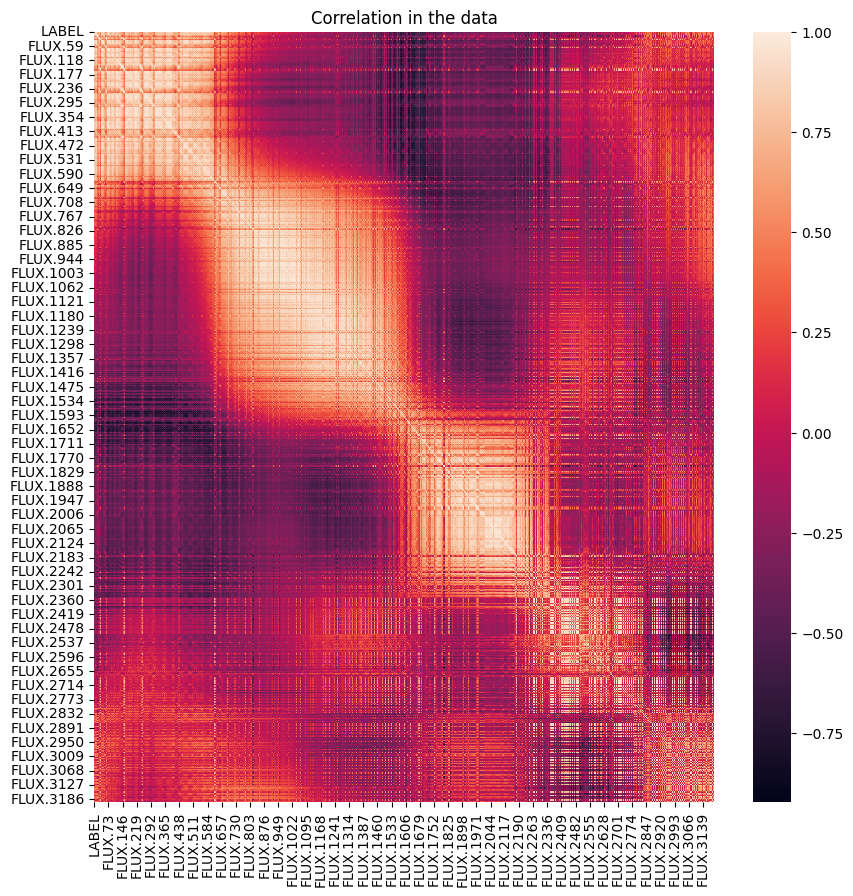

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(train_data.corr())
plt.title('Correlation in the data')
plt.show()

In [9]:
train_y=train_data[train_data['LABEL'] == 1]
train_n=train_data[train_data['LABEL'] < 1]
train_t_n=train_n.iloc[:,1:].T
train_t_y=train_y.iloc[:,1:].T
train_t_y.head(1)

0      1       2       3        4      5     6       7       8   \
FLUX.1  93.85 -38.88  532.64  326.52 -1107.21  211.1  9.34  238.77 -103.54   

            9   ...      27    28     29     30      31     32     33      34  \
FLUX.1 -265.91  ...  124.39 -63.5  31.29 -472.5  194.82  26.96  43.07 -248.23   

           35     36  
FLUX.1  22.82  26.24  

[1 rows x 37 columns]

In [10]:
fig = make_subplots(rows=2, cols=2,subplot_titles=("Flux variation of star 37", "Flux variation of star 5086",
                                                   "Flux variation of star 3000", "Flux variation of star 3001"))
fig.add_trace(
    go.Scatter(y=train_t_n[37], x=train_t_n.index),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(y=train_t_n[5086], x=train_t_n.index),
    row=1, col=2
)
fig.add_trace(
    go.Scatter(y=train_t_n[3000], x=train_t_n.index),
    row=2, col=1
)
fig.add_trace(
    go.Scatter(y=train_t_n[3001], x=train_t_n.index),
    row=2, col=2
)
fig.update_layout(height=600, width=800, title_text="Non Exoplanets Star examples",showlegend=False)
fig.show()

In [11]:
fig = make_subplots(rows=2, cols=2,subplot_titles=("Flux variation of star 0", "Flux variation of star 1",
                                                   "Flux variation of star 35", "Flux variation of star 36"))
fig.add_trace(
    go.Scatter(y=train_t_y[0], x=train_t_y.index),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(y=train_t_y[1], x=train_t_y.index),
    row=1, col=2
)
fig.add_trace(
    go.Scatter(y=train_t_y[35], x=train_t_y.index),
    row=2, col=1
)
fig.add_trace(
    go.Scatter(y=train_t_y[36], x=train_t_y.index),
    row=2, col=2
)
fig.update_layout(height=600, width=800, title_text="Exoplanets Stars examples",showlegend=False)

In [12]:
#Normalizing the flux
trainx=train_data.iloc[:,1:]
textx=test_data.iloc[:,1:]

scaler=StandardScaler()

train_scaled=scaler.fit_transform(trainx)
test_scaled=scaler.fit_transform(textx)

In [13]:
def train_and_predict_svm(kernel, X_train, y_train, X_test, y_test):
    svclassifier = SVC(kernel=kernel)
    svclassifier.fit(X_train, y_train)
    y_pred = svclassifier.predict(X_test)

    print(f"Results for {kernel} kernel:")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

# Prepare data
trainy = train_data[['LABEL']]
testy = test_data[['LABEL']]

# Perform PCA
pca = PCA(n_components=6)
pca.fit(train_scaled)

print("PCA Explained Variance Ratio:", pca.explained_variance_ratio_)
print("PCA Singular Values:", pca.singular_values_)

# Transform data using PCA
trns_x = pca.transform(train_scaled)
trns_y = pca.transform(test_scaled)

kernels = ['linear', 'poly', 'sigmoid']

for kernel in kernels:
    train_and_predict_svm(kernel, train_scaled, trainy['LABEL'], test_scaled, testy['LABEL'])

# Use PCA-transformed data for RBF kernel
train_and_predict_svm('rbf', trns_x, trainy['LABEL'], trns_y, testy['LABEL'])

PCA Explained Variance Ratio: [0.27373539 0.22536219 0.14929127 0.09802696 0.05819974 0.04072856]
PCA Singular Values: [2109.92811427 1914.4441909  1558.18634093 1262.62663108  972.8876534
  813.86372792]
Results for linear kernel:
[[556   9]
 [  5   0]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       565
           1       0.00      0.00      0.00         5

    accuracy                           0.98       570
   macro avg       0.50      0.49      0.49       570
weighted avg       0.98      0.98      0.98       570

Results for poly kernel:
[[565   0]
 [  5   0]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       565
           1       0.00      0.00      0.00         5

    accuracy                           0.99       570
   macro avg       0.50      0.50      0.50       570
weighted avg       0.98      0.99      0.99       570

Results for sigmoid kernel:
[[565   0]
 [  

Optimization terminated successfully.
         Current function value: 0.693147
         Iterations 3
                         Results: Logit
Model:              Logit            Method:           MLE      
Dependent Variable: new1             Pseudo R-squared: -15.098  
Date:               2024-12-10 02:17 AIC:              7064.0771
No. Observations:   5087             BIC:              7103.2838
Df Model:           5                Log-Likelihood:   -3526.0  
Df Residuals:       5081             LL-Null:          -219.04  
Converged:          1.0000           LLR p-value:      1.0000   
No. Iterations:     3.0000           Scale:            1.0000   
-------------------------------------------------------------------
       Coef.     Std.Err.       z       P>|z|      [0.025    0.975]
-------------------------------------------------------------------
x1     0.0000      0.0009     0.0165    0.9868    -0.0018    0.0019
x2    -0.0000      0.0010    -0.0013    0.9989    -0.0020    0.002

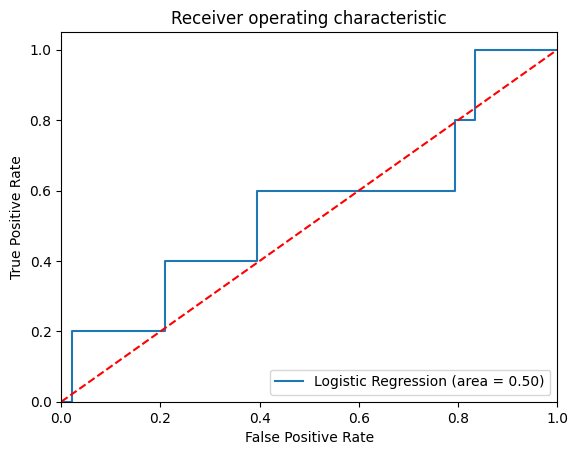

In [14]:
# Create a new binary column 'new1' in the trainy DataFrame based on the values in 'LABEL'.
trainy.loc[trainy['LABEL'] == 0, 'new1'] = 0
trainy.loc[trainy['LABEL'] > 0, 'new1'] = 1
testy.loc[testy['LABEL'] > 0, 'new1'] = 1
testy.loc[testy['LABEL'] == 0, 'new1'] = 0

# Logistic Regression using Statsmodels (Logit) on transformed data (trns_x)
logit_model = sm.Logit(trainy['new1'], trns_x)
result = logit_model.fit()  # Fit the model and display the summary of results (coefficients, p-values, etc.)
print(result.summary2())  # summary2 gives a more detailed summary with extra statistical information.

# Logistic Regression using scikit-learn
logreg = LogisticRegression()
logreg.fit(trns_x, trainy['new1'])
y_pred = logreg.predict(trns_y)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(trns_y, testy['new1'])))

#Calculate the Metrics
logit_roc_auc = roc_auc_score(testy['new1'], logreg.predict(trns_y))
fpr, tpr, thresholds = roc_curve(testy['new1'], logreg.predict_proba(trns_y)[:, 1])

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')

plt.legend(loc="lower right")

plt.savefig('Log_ROC')

plt.show()

In [15]:
over = SMOTE(random_state=0)

ov_train_x,ov_train_y=over.fit_resample(trns_x, trainy['new1'])
ov_train_y=ov_train_y.astype('int')
ov_train_y.value_counts()

ov_train_y=ov_train_y.values.tolist()

svclassifier = SVC(kernel='rbf')
svclassifier.fit(ov_train_x, ov_train_y)
y_pred = svclassifier.predict(trns_y)

print(confusion_matrix(testy['new1'], y_pred))
print(classification_report(testy['new1'], y_pred))

[[552  13]
 [  4   1]]
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98       565
         1.0       0.07      0.20      0.11         5

    accuracy                           0.97       570
   macro avg       0.53      0.59      0.55       570
weighted avg       0.98      0.97      0.98       570



In [16]:
# Convert to numpy array if not already
ov_train_y = np.array(ov_train_y)

# Split data into training and validation sets
tr_x, v_x, tr_y, V_y = train_test_split(ov_train_x, ov_train_y, test_size=0.2)
print(f"Validation data size: {len(v_x)}")

Validation data size: 2020


Epoch 1/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.5515 - loss: 3.8560 - val_accuracy: 0.5589 - val_loss: 2.1074 - learning_rate: 0.1000
Epoch 2/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5717 - loss: 1.8455 - val_accuracy: 0.5535 - val_loss: 1.2686 - learning_rate: 0.0891
Epoch 3/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5667 - loss: 1.1677 - val_accuracy: 0.5059 - val_loss: 0.9493 - learning_rate: 0.0794
Epoch 4/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5689 - loss: 0.9007 - val_accuracy: 0.4842 - val_loss: 0.8082 - learning_rate: 0.0708
Epoch 5/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5558 - loss: 0.7914 - val_accuracy: 0.5470 - val_loss: 0.7589 - learning_rate: 0.0631
Epoch 6/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5540 - loss: 0.7434 - val_accuracy: 0.5530 - val_loss: 0.7247 - learning_rate: 0.0562
Epoch 7/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5667 - loss: 0.7134 - 

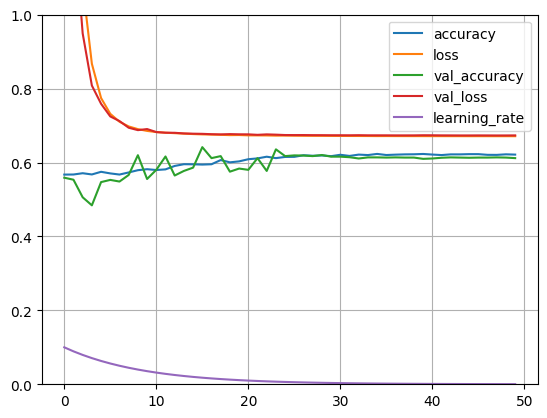

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
[[ 30 535]
 [  0   5]]
              precision    recall  f1-score   support

         0.0       1.00      0.05      0.10       565
         1.0       0.01      1.00      0.02         5

    accuracy                           0.06       570
   macro avg       0.50      0.53      0.06       570
weighted avg       0.99      0.06      0.10       570


**********************************************

**********************************************

**********************************************

**********************************************
Epoch 1/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5234 - loss: 418.3885 - val_accuracy: 0.5480 - val_loss: 0.6772 - learning_rate: 0.1000
Epoch 2/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5608 - loss: 0.6689 - val_accuracy: 0.6881 - val_loss: 0.6600 - learning_rate: 0.0891
Epoch 3/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5540 - loss: 0.6717 - val_accuracy: 0.5317 - va

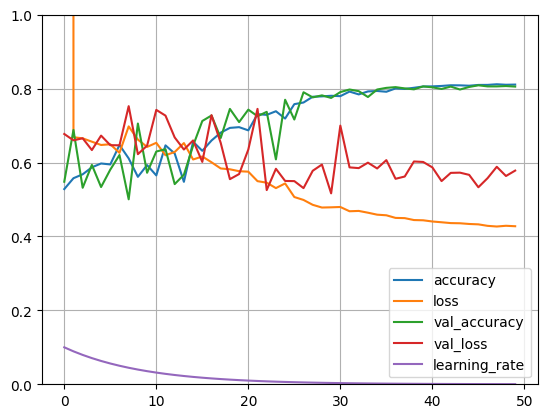

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[[540  25]
 [  5   0]]
              precision    recall  f1-score   support

         0.0       0.99      0.96      0.97       565
         1.0       0.00      0.00      0.00         5

    accuracy                           0.95       570
   macro avg       0.50      0.48      0.49       570
weighted avg       0.98      0.95      0.96       570



In [17]:
# Function to build the first model (Model A: SELU, L2 Regularizer)
def build_model_A(input_shape, activation="selu", kernel_regularizer=keras.regularizers.l2(0.01), output_units=2):
    model = keras.models.Sequential([
        keras.layers.Dense(300, activation=activation, input_shape=input_shape, kernel_regularizer=kernel_regularizer),
        keras.layers.Dense(200, activation=activation, kernel_regularizer=kernel_regularizer),
        keras.layers.Dense(100, activation=activation, kernel_regularizer=kernel_regularizer),
        keras.layers.Dense(output_units, activation="softmax")  # Output layer with softmax
    ])
    return model

# Function to build the second model (Model B: Swish, He Normal Initialization)
def build_model_B(input_shape, activation="swish", kernel_initializer="he_normal", output_units=2):
    model = keras.models.Sequential([
        keras.layers.Dense(300, activation=activation, input_shape=input_shape, kernel_initializer=kernel_initializer),
        keras.layers.Dense(200, activation=activation, kernel_initializer=kernel_initializer),
        keras.layers.Dense(100, activation=activation, kernel_initializer=kernel_initializer),
        keras.layers.Dense(output_units, activation="softmax")  # Output layer with softmax
    ])
    return model

# Generalized function to create an optimizer
def create_optimizer(optimizer_type="SGD", learning_rate=0.1):
    if optimizer_type == "SGD":
        return keras.optimizers.SGD(learning_rate=learning_rate, clipvalue=1.0)
    elif optimizer_type == "Adam":
        return tf.keras.optimizers.Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-07)
    else:
        raise ValueError(f"Unknown optimizer type: {optimizer_type}")

# Function to create a learning rate scheduler
def create_lr_scheduler(lr0, s, epochs):
    def exp_decay_fn(epoch):
        return lr0 * 0.1 ** (epoch / s)
    return keras.callbacks.LearningRateScheduler(exp_decay_fn)

# Function to create the ReduceLROnPlateau callback
def create_lr_plateau(factor=0.5, patience=5):
    return keras.callbacks.ReduceLROnPlateau(factor=factor, patience=patience)

# Generalized function to compile, train, and evaluate the model
def train_and_evaluate_model(model, tr_x, tr_y, v_x, V_y, epochs=50, optimizer=None, lr_scheduler=None, lr_plateau=None):
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=optimizer,
                  metrics=["accuracy"])

    # Train the model with optional callbacks
    history = model.fit(tr_x, tr_y, epochs=epochs, validation_data=(v_x, V_y),
                        callbacks=[lr_scheduler, lr_plateau] if lr_scheduler else [lr_plateau])

    return model, history

# Function to plot training history
def plot_training_history(history):
    pd.DataFrame(history.history).plot()
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

# Function to evaluate the model on test data
def evaluate_model(model, trns_y, testy):
    predict = np.argmax(model.predict(trns_y), axis=1)
    print(confusion_matrix(testy['new1'], predict))
    print(classification_report(testy['new1'], predict))

# Main execution

# Define parameters
epochs = 50
lr0 = 0.1
s = 20
learning_rate = 0.001

# ------------- Model A: SELU Activation and L2 Regularization -------------
# Build the Model A
model_A = build_model_A(input_shape=(tr_x.shape[1],), activation="selu", kernel_regularizer=keras.regularizers.l2(0.01))

# Create the learning rate scheduler and ReduceLROnPlateau callback for Model A
lr_scheduler_A = create_lr_scheduler(lr0=lr0, s=s, epochs=epochs)
lr_plateau_A = create_lr_plateau(factor=0.5, patience=5)

# Create the optimizer (SGD) for Model A
optimizer_A = create_optimizer(optimizer_type="SGD", learning_rate=lr0)

# Train and evaluate Model A
model_A, history_A = train_and_evaluate_model(model_A, tr_x, tr_y, v_x, V_y, epochs=epochs,
                                              optimizer=optimizer_A, lr_scheduler=lr_scheduler_A, lr_plateau=lr_plateau_A)

# Plot the training history of Model A
print("Training history of Model A:")
plot_training_history(history_A)

# Evaluate Model A on test data
evaluate_model(model_A, trns_y, testy)
print("\n**********************************************")
print("\n**********************************************")
print("\n**********************************************")
print("\n**********************************************")
# ------------- Model B: Swish Activation and He Normal Initialization -------------
# Build the Model B
model_B = build_model_B(input_shape=(tr_x.shape[1],), activation="swish", kernel_initializer="he_normal")

# Create the learning rate scheduler and ReduceLROnPlateau callback for Model B
lr_scheduler_B = create_lr_scheduler(lr0=lr0, s=s, epochs=epochs)
lr_plateau_B = create_lr_plateau(factor=0.5, patience=5)

# Create the optimizer (Adam) for Model B
optimizer_B = create_optimizer(optimizer_type="Adam", learning_rate=learning_rate)

# Train and evaluate Model B
model_B, history_B = train_and_evaluate_model(model_B, tr_x, tr_y, v_x, V_y, epochs=epochs,
                                              optimizer=optimizer_B, lr_scheduler=lr_scheduler_B, lr_plateau=lr_plateau_B)

# Plot the training history of Model B
print("Training history of Model B:")
plot_training_history(history_B)

# Evaluate Model B on test data
evaluate_model(model_B, trns_y, testy)

In [18]:
# Function to train, predict, and evaluate the model
def train_and_evaluate_xgboost(scale_pos_weight, train_x, train_y, test_x, test_y):
    # Initialize and train the XGBoost model
    clf = XGBClassifier(scale_pos_weight=scale_pos_weight)
    clf.fit(train_x, train_y)

    # Make predictions
    predict = clf.predict(test_x)

    # Evaluate the model
    cm = confusion_matrix(test_y, predict)
    auc = roc_auc_score(test_y, predict)

    # Print evaluation results
    print(f'scale_pos_weight = {scale_pos_weight}')
    print('Confusion Matrix: \n', cm)
    print('Classification Report: \n', classification_report(test_y, predict))
    print(f'AUC of test set: {auc:.2f}\n')

# List of scale_pos_weight values to loop over
scale_pos_weights = [2, 0.99, 0.60, 0.50, 0.33, 0.20, 0.10, 0.33]

# Evaluate the model for each value of scale_pos_weight
for weight in scale_pos_weights:
    train_and_evaluate_xgboost(weight, ov_train_x, ov_train_y, trns_y, testy['new1'])

scale_pos_weight = 2
Confusion Matrix: 
 [[333 232]
 [  3   2]]
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.99      0.59      0.74       565
         1.0       0.01      0.40      0.02         5

    accuracy                           0.59       570
   macro avg       0.50      0.49      0.38       570
weighted avg       0.98      0.59      0.73       570

AUC of test set: 0.49

scale_pos_weight = 0.99
Confusion Matrix: 
 [[353 212]
 [  3   2]]
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.99      0.62      0.77       565
         1.0       0.01      0.40      0.02         5

    accuracy                           0.62       570
   macro avg       0.50      0.51      0.39       570
weighted avg       0.98      0.62      0.76       570

AUC of test set: 0.51

scale_pos_weight = 0.6
Confusion Matrix: 
 [[459 106]
 [  3   2]]
Classification Report: 
               precision    r

In [19]:
train_data['STAR_ID'] = range(1, len(train_data) + 1)

In [20]:
# Constants for thresholds
PERIODICITY_THRESHOLD = 0.7  # Threshold for periodic signal detection
DIP_THRESHOLD = 5  # Threshold for number of dips
HIGH_VARIABILITY_THRESHOLD = 0.1  # Threshold for high variability (standard deviation)

def detect_periodicity(flux):
    """Detect periodicity by performing FFT on the flux."""
    N = len(flux)
    T = 1.0  # Assuming unit time intervals
    x = np.linspace(0.0, N*T, N, endpoint=False)
    flux = np.ascontiguousarray(flux)  # Ensure contiguous memory layout
    yf = fft(flux)
    xf = np.fft.fftfreq(N, T)[:N//2]  # Frequency bins
    return xf, 2.0/N * np.abs(yf[:N//2])  # Return positive frequencies and corresponding amplitudes

def detect_dips(flux):
    """Detect dips (negative peaks) in the flux signal."""
    peaks, _ = find_peaks(-flux)  # Dips are the negative peaks
    return peaks

def classify_variability_type(flux, periodicity_threshold=PERIODICITY_THRESHOLD,
                              dip_threshold=DIP_THRESHOLD,
                              high_variability_threshold=HIGH_VARIABILITY_THRESHOLD):
    """
    Classify the type of variability based on flux data and thresholds.
    """
    # Detect periodicity
    xf, yf = detect_periodicity(flux)
    dominant_frequency = xf[np.argmax(yf)]
    max_amplitude = np.max(yf)

    if len(xf[yf > periodicity_threshold]) > 0:
        return 'Pulsating Star', dominant_frequency, max_amplitude

    # Detect dips
    dips = detect_dips(flux)
    if len(dips) > dip_threshold:
        return 'Eclipsing Binary', dominant_frequency, max_amplitude

    # Check for high variability
    if np.std(flux) > high_variability_threshold:
        return 'Cataclysmic Variable', dominant_frequency, max_amplitude

    # Default case for irregular variability
    return 'Irregular Variable', dominant_frequency, max_amplitude

def process_data(df, threshold_params=None):
    """
    Process the DataFrame, classifying each row based on its flux and storing the results.
    """
    if threshold_params is None:
        threshold_params = {
            'periodicity_threshold': PERIODICITY_THRESHOLD,
            'dip_threshold': DIP_THRESHOLD,
            'high_variability_threshold': HIGH_VARIABILITY_THRESHOLD
        }

    # Iterate over DataFrame rows
    for index, row in df.iterrows():
        flux = row[:-3]  # Extract flux (assume last 3 columns are not relevant for flux)

        # Classify variability type
        variability_type, dominant_frequency, max_amplitude = classify_variability_type(
            flux, **threshold_params)

        # Store the results in the DataFrame
        df.loc[index, 'periodicity_X'] = dominant_frequency
        df.loc[index, 'periodicity_Y'] = max_amplitude
        df.loc[index, 'variability_type'] = variability_type

    return df

# Example usage with new_df:
new_df = process_data(train_data)

In [23]:
fig = px.scatter(new_df, x='STAR_ID', y='variability_type')
fig.show()

In [24]:
def estimate_luminosity(flux_values):
    """
    Simplistic approach: integrate the flux values
    Assume baseline flux corresponds to luminosity of 1 solar unit
    """
    baseline_flux = np.median(flux_values)
    total_flux = np.sum(flux_values)
    luminosity = total_flux / (baseline_flux * len(flux_values))
    return luminosity

def estimate_mass(luminosity, star_type):
    if "Main Sequence" in star_type or "Dwarfs (M Type)" in star_type or "Gaint" in star_type:
        # Mass-luminosity relation for main-sequence stars
        mass = luminosity ** (1/3.5)
    elif star_type == "Pulsating Star":
        mass = luminosity ** (1 / 4.0)
    else:
        # Placeholder for other star types
        mass = 1.0  # Default value
    return mass

# Stefan-Boltzmann constant in W m^-2 K^-4
sigma = 5.67e-8

def calculate_radius(luminosity, temperature):
    # Convert luminosity to watts (assuming solar units)
    luminosity_watts = luminosity * 3.828e26  # 1 L_sun = 3.828e26 W

    # Calculate radius using the Stefan-Boltzmann law
    radius_meters = np.sqrt(luminosity_watts / (4 * np.pi * sigma * temperature**4))

    # Convert radius to solar radii (1 R_sun = 6.96e8 meters)
    radius_solar_radii = radius_meters / 6.96e8
    return radius_solar_radii

def estimate_temperature_pulsating(luminosity):
    # Typical temperature range for pulsating stars
    min_temp = 4000  # Minimum temperature in Kelvin
    max_temp = 7000  # Maximum temperature in Kelvin

    temperature = max_temp - (luminosity / 10) * (max_temp - min_temp)

    # Ensure temperature is within the typical range
    temperature = max(min_temp, min(max_temp, temperature))
    return temperature

def classify_star(temp,lum):
    star_type=''
    if temp > 6000 and lum > 10:
        star_type = 'Main Sequence Star (O/B Type)'
    elif temp <= 6000 and lum <= 10:
        star_type = 'Dwarfs (M Type)'
    elif temp > 6000 and lum <= 10:
        star_type = 'Main Sequence Star (A/F Type)'
    elif temp <= 6000 and lum > 10:
        star_type = 'Giants (K/M Type)'
    else:
        star_type = 'Unknown'
    return star_type

def estimate_habitable_zone(luminosity):
    return math.sqrt(luminosity)

def estimate_lifespan(mass):
    # Lifespan formula: 10 * (M / M_sun)^-2.5 billion years
    lifespan = 10 * (mass ** -2.5)
    return lifespan

def estimate_color(temperature):
    if temperature > 30000:
        return 'blue'
    elif 10000 < temperature <= 30000:
        return 'blue-white'
    elif 7500 < temperature <= 10000:
        return 'white'
    elif 6000 < temperature <= 7500:
        return 'yellow-white'
    elif 5200 < temperature <= 6000:
        return 'yellow'
    elif 3700 < temperature <= 5200:
        return 'orange'
    else:
        return 'red'

In [25]:
for index, row in new_df.iterrows():
        flux_values = row[:3197]
        flux_values_array = flux_values.to_numpy()
        flux_values_array = np.abs(flux_values_array)
        luminosity = estimate_luminosity(flux_values_array)
        temperature = estimate_temperature_pulsating(luminosity)
        color=estimate_color(temperature)
        new_df.loc[index, 'star_type']=classify_star(temperature,luminosity)
        mass = estimate_mass(luminosity, star_type=new_df.loc[index, 'star_type'])
        radius = calculate_radius(luminosity, temperature)
        new_df.loc[index, 'hab_zone'] = estimate_habitable_zone(luminosity)
        new_df.loc[index, 'life_span'] = estimate_lifespan(mass)
        new_df.loc[index, 'luminosity'] = luminosity
        new_df.loc[index, 'mass'] = mass
        new_df.loc[index, 'temperature'] = temperature
        new_df.loc[index, 'color'] = color
        new_df.loc[index, 'radius'] = radius

In [26]:
# 1. Histogram plot with 'star_type' on the x-axis and colored by 'star_type'
fig1 = px.histogram(new_df, x='star_type', color='star_type', text_auto=True, width=1000, height=1000)
fig1.update_layout(title="Distribution of Star Types")  # Adding title
fig1.show()

# 2. Scatter plot of 'luminosity' vs 'mass', colored by 'luminosity'
fig2 = px.scatter(new_df, x='luminosity', y='mass', color='luminosity', width=1000, height=1000)
fig2.update_layout(title="Scatter Plot: Luminosity vs Mass")  # Adding title
fig2.show()

# 3. Scatter plot of 'luminosity' vs 'radius', colored by 'luminosity'
fig3 = px.scatter(new_df, x='luminosity', y='radius', color='luminosity', width=1000, height=1000)
fig3.update_layout(title="Scatter Plot: Luminosity vs Radius")  # Adding title
fig3.show()

# 4. Sunburst plot with 'star_type' and 'STAR_ID' as path, with 'radius' as values and colored by 'luminosity'
fig4 = px.sunburst(new_df, path=['star_type', 'STAR_ID'], values='radius',
                   color='luminosity', hover_data=['mass', 'luminosity'],
                   color_continuous_scale='jet', width=1000, height=1000)
fig4.update_layout(title="Sunburst Plot: Star Types and IDs")  # Adding title
fig4.show()

# 5. Scatter plot with 'radius' vs 'mass', sized by 'radius', colored by 'luminosity', log-scaled x-axis
fig5 = px.scatter(new_df, x="radius", y="mass",
                  size="radius", color="luminosity", hover_name="STAR_ID",
                  log_x=True, size_max=60, width=1000, height=1000)
fig5.update_layout(title="Scatter Plot: Radius vs Mass")  # Adding title
fig5.show()

# Scatter plot with radius vs luminosity, color by star type, size by mass
fig6 = px.scatter(new_df,
                 x='radius',
                 y='luminosity',
                 color='star_type',
                 symbol='star_type',
                 size="mass",
                 labels={
                     'Star Radius': 'Star Radius (solar units)',
                     'Star Luminosity': 'Star Luminosity (solar units)',
                     'Star Type': 'Star Type'
                 },
                 title='Star Radius vs. Luminosity by Star Type',
                 width=1000,
                 height=1000)

# Display the figure
fig6.show()